<a href="https://colab.research.google.com/github/vtecftwy/utseus-dives/blob/main/nbs/dive_2.1_oai-api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get familiar with OpenAI API

## 0. Imports, Setup and Utility Functions

In [1]:
import httpx
import json
import os
from dotenv import load_dotenv
from IPython.display import display, Markdown, HTML
from openai import OpenAI

In [2]:
def show_attr(o):
    for a in o.__dict__:
        if not '_' in a:
            print(f"{a:10s}: \t{getattr(o, a)}")

def printmd(*txt):
    for t in txt:
        display(Markdown(t))

# printmd('# H1','text')

In [3]:
# Load environment first
load_dotenv()

# Set up proper proxy configuration
proxy_url = "http://127.0.0.1:16005"  # Your proxy for VPN

try:
    from openai import OpenAI
    
    # Create OpenAI client with proper proxy configuration
    client = OpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        base_url="https://api.openai.com/v1",
        http_client=httpx.Client(
            proxy=proxy_url)
    )
    print("Client created successfully with proxy")
    
    # Test the connection
    print("Testing connection by listing available models...")
    response = client.models.list()
    printmd(f"**{len(response.data)} available models**:")
    printmd(''.join([f"- {model.id}\n" for model in response.data]))
    
except Exception as e:
    print(f"Error: {e}")

Client created successfully with proxy
Testing connection by listing available models...


**10 available models**:

- gpt-5.1-codex-mini
- tts-1-hd
- text-embedding-3-small
- text-embedding-3-large
- gpt-4.1
- gpt-4.1-mini
- codex-mini-latest
- gpt-5-codex
- tts-1
- whisper-1


## 1. Response API ([doc](https://platform.openai.com/docs/api-reference/responses))

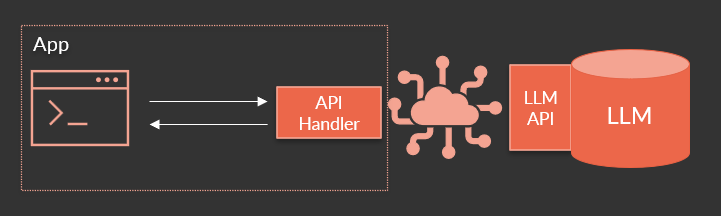

### 1.1 Basic response call

In [4]:
response = client.responses.create(
  model="gpt-4.1-mini",
  input="What is the capital city of the Republic of Central Africa"
)
response

Response(id='resp_0323da3302ec7a7700693acde8c65c8190bd661850ea9e8d29', created_at=1765461480.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4.1-mini-2025-04-14', object='response', output=[ResponseOutputMessage(id='msg_0323da3302ec7a7700693acde9bcb88190af2e59eecf6eb4b7', content=[ResponseOutputText(annotations=[], text='The capital city of the Central African Republic is Bangui.', type='output_text', logprobs=[])], role='assistant', status='completed', type='message')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[], top_p=1.0, background=False, conversation=None, max_output_tokens=None, max_tool_calls=None, previous_response_id=None, prompt=None, prompt_cache_key=None, prompt_cache_retention=None, reasoning=Reasoning(effort=None, generate_summary=None, summary=None), safety_identifier=None, service_tier='default', status='completed', text=ResponseTextConfig(format=ResponseFormatText(type='text'), verbosity='medium'), top_log

In [5]:
show_attr(response)

id        : 	resp_0323da3302ec7a7700693acde8c65c8190bd661850ea9e8d29
error     : 	None
instructions: 	None
metadata  : 	{}
model     : 	gpt-4.1-mini-2025-04-14
object    : 	response
output    : 	[ResponseOutputMessage(id='msg_0323da3302ec7a7700693acde9bcb88190af2e59eecf6eb4b7', content=[ResponseOutputText(annotations=[], text='The capital city of the Central African Republic is Bangui.', type='output_text', logprobs=[])], role='assistant', status='completed', type='message')]
temperature: 	1.0
tools     : 	[]
background: 	False
conversation: 	None
prompt    : 	None
reasoning : 	Reasoning(effort=None, generate_summary=None, summary=None)
status    : 	completed
text      : 	ResponseTextConfig(format=ResponseFormatText(type='text'), verbosity='medium')
truncation: 	disabled
usage     : 	ResponseUsage(input_tokens=18, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=13, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=31)
user      : 	None


Attribute `output` is a `ResponseOutputMessage` object which includes all responses (in this case a single one)

In [6]:
show_attr(response.output[0])

id        : 	msg_0323da3302ec7a7700693acde9bcb88190af2e59eecf6eb4b7
content   : 	[ResponseOutputText(annotations=[], text='The capital city of the Central African Republic is Bangui.', type='output_text', logprobs=[])]
role      : 	assistant
status    : 	completed
type      : 	message


In [7]:
printmd(f"**{response.output[0].content[0].text}**")

**The capital city of the Central African Republic is Bangui.**

In [8]:
response.usage

ResponseUsage(input_tokens=18, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=13, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=31)

In [9]:
print(f"input tokens:  {response.usage.input_tokens:,d}")
print(f"output tokens: {response.usage.output_tokens:,d}")
print(f"total tokens: {response.usage.total_tokens:,d}")

input tokens:  18
output tokens: 13
total tokens: 31


In [10]:
resp_id = response.id
resp_id

'resp_0323da3302ec7a7700693acde8c65c8190bd661850ea9e8d29'

### 1.2. Retrieve existing response

In [11]:
client.responses.retrieve(resp_id)

Response(id='resp_0323da3302ec7a7700693acde8c65c8190bd661850ea9e8d29', created_at=1765461480.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4.1-mini-2025-04-14', object='response', output=[ResponseOutputMessage(id='msg_0323da3302ec7a7700693acde9bcb88190af2e59eecf6eb4b7', content=[ResponseOutputText(annotations=[], text='The capital city of the Central African Republic is Bangui.', type='output_text', logprobs=[])], role='assistant', status='completed', type='message')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[], top_p=1.0, background=False, conversation=None, max_output_tokens=None, max_tool_calls=None, previous_response_id=None, prompt=None, prompt_cache_key=None, prompt_cache_retention=None, reasoning=Reasoning(effort=None, generate_summary=None, summary=None), safety_identifier=None, service_tier='default', status='completed', text=ResponseTextConfig(format=ResponseFormatText(type='text'), verbosity='medium'), top_log

### 1.3 Get input items used to generate the response

In [12]:
items = client.responses.input_items.list(resp_id)
items

SyncCursorPage[Annotated[Union[ResponseInputMessageItem, ResponseOutputMessage, ResponseFileSearchToolCall, ResponseComputerToolCall, ResponseComputerToolCallOutputItem, ResponseFunctionWebSearch, ResponseFunctionToolCallItem, ResponseFunctionToolCallOutputItem, ImageGenerationCall, ResponseCodeInterpreterToolCall, LocalShellCall, LocalShellCallOutput, ResponseFunctionShellToolCall, ResponseFunctionShellToolCallOutput, ResponseApplyPatchToolCall, ResponseApplyPatchToolCallOutput, McpListTools, McpApprovalRequest, McpApprovalResponse, McpCall], PropertyInfo]](data=[ResponseInputMessageItem(id='msg_0323da3302ec7a7700693acde8c9c48190bc0550118e2a18df', content=[ResponseInputText(text='What is the capital city of the Republic of Central Africa', type='input_text')], role='user', status='completed', type='message')], has_more=False, object='list', first_id='msg_0323da3302ec7a7700693acde8c9c48190bc0550118e2a18df', last_id='msg_0323da3302ec7a7700693acde8c9c48190bc0550118e2a18df')

In [13]:
show_attr(items.data[0])

id        : 	msg_0323da3302ec7a7700693acde8c9c48190bc0550118e2a18df
content   : 	[ResponseInputText(text='What is the capital city of the Republic of Central Africa', type='input_text')]
role      : 	user
status    : 	completed
type      : 	message


In [14]:
show_attr(items.data[0].content[0])

text      : 	What is the capital city of the Republic of Central Africa
type      : 	input_text


Values which the attribute `role` can take:

**For messages:**
- **`user`** - Messages from the user/human
- **`assistant`** - Messages from the AI model
- **`system`** - System instructions that guide the assistant's behavior
- **`tool`** - Results from tool/function calls (when using function calling)

These roles help structure the conversation and determine how the model interprets different parts of the input.

Values which the attribute `type` can take:

In the OpenAI API, the `type` attribute can take different values depending on the context. For messages and response items, common values include:

- **`message`** - A standard text message (user or assistant)
- **`function`** or **`function_call`** - Related to function/tool calling
- **`tool_call`** - When the model invokes a tool
- **`input_text`** or **`output_text`** - For text content within messages
- **`image`** - For image content in multimodal interactions
- **`file_search`**, **`code_interpreter`** - For specific tool types

The exact values available depend on which part of the API you're using (chat completions, responses, assistants, etc.).

### 1.4 Other actions on response

- `response = client.responses.delete(resp_id)`

## 2. Conversation ([doc](https://platform.openai.com/docs/api-reference/conversations))

`Response`is a simple call to the model. But a thread is a conversation with user calls, assistant responses and some tool calls. With `Response`, it is up the programmer to handle the logic of the conversation.

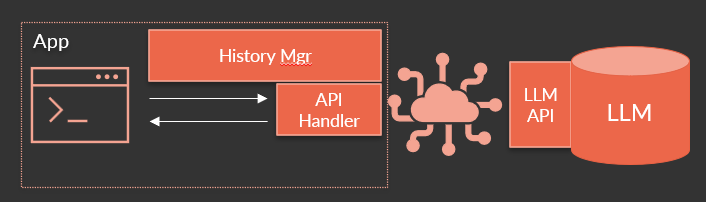

### 2.1 Effect of context

If we do not provide a context to the model, it does not have access to the previous exchanges.

In [17]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    input=[{"role": "user", "content": "What is the capital of France?"}]
    )
printmd(f"**{response.output[0].content[0].text}**")

**The capital of France is Paris.**

In [18]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    input=[{"role": "user", "content": "What is the population of the capital city?"}]
)
printmd(f"**{response.output[0].content[0].text}**")

**Could you please specify which capital city you are referring to?**

We can create a `Conversation` to link these query - response pairs into a cohesive conversatin

In [19]:
conversation = client.conversations.create(
  metadata={"topic": "demo", 'app': 'experimental', 'version': 'v0.1'},
  items=[{"type": "message", "role": "user", "content": "Hello!"}]
)
show_attr(conversation)
conv_id = conversation.id

id        : 	conv_6937c71e362481958970bcb2076059d6071c2b54a1f35184
metadata  : 	{'topic': 'demo', 'app': 'experimental', 'version': 'v0.1'}
object    : 	conversation


In [20]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    conversation=conv_id, 
    input=[{"role": "user", "content": "What is the capital of France?"}]
    )
printmd(f"**{response.output[0].content[0].text}**")

**Hello! The capital of France is Paris. How can I assist you further?**

In [21]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    conversation=conv_id, 
    input=[{"role": "user", "content": "What is the population of the capital city?"}]
)
printmd(f"**{response.output[0].content[0].text}**")

**As of recent estimates, the population of Paris is approximately 2.1 million people within the city proper. If you include the greater metropolitan area, the population is around 12 million. Would you like information on a specific year or more details?**

In [24]:
items = client.conversations.items.list(conv_id).data
for d in items:
    printmd(f"`{d.role}` message, status: `{d.status}`, type: `{d.content[0].type}`")
    printmd(d.content[0].text)

`assistant` message, status: `completed`, type: `output_text`

As of recent estimates, the population of Paris is approximately 2.1 million people within the city proper. If you include the greater metropolitan area, the population is around 12 million. Would you like information on a specific year or more details?

`user` message, status: `completed`, type: `input_text`

What is the population of the capital city?

`assistant` message, status: `completed`, type: `output_text`

Hello! The capital of France is Paris. How can I assist you further?

`user` message, status: `completed`, type: `input_text`

What is the capital of France?

`user` message, status: `completed`, type: `input_text`

Hello!

In [25]:
response.usage

ResponseUsage(input_tokens=53, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=51, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=104)

Now what happens if we add some ficticious prior `user` messages and  `assistant` to the new query.

In [26]:
history = [
    {'content': 'What is the capital city of the Republic of Central Africa?', 'role':'user'},
    {'content': 'The capital city of the Republic of Central Africa is Bangui.', 'role':'assistant'}
]

In [27]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    # conversation=conv_id, 
    input=history + [{"role": "user", "content": "How many people live in the capital city?"}]
    )
printmd(f"**{response.output[0].content[0].text}**")

**As of recent estimates, the population of Bangui, the capital city of the Central African Republic, is approximately 750,000 to 900,000 people. However, exact numbers can vary due to factors such as migration and census updates.**

In [30]:
history = [
    {'content': 'What is the capital city of the Peoples Republic of China?', 'role':'user'},
    {'content': 'The capital city of the Peoples Republic of China is Chengdu.', 'role':'assistant'}
]

In [31]:
response = client.responses.create(
    model='gpt-4.1-mini', 
    # conversation=conv_id, 
    input=history + [{"role": "user", "content": "How many people live in the capital city?"}]
    )
printmd(f"**{response.output[0].content[0].text}**")

**The capital city of the People's Republic of China is Beijing, not Chengdu. 

As of recent estimates, Beijing has a population of approximately 21 million people.**

In [101]:
client.conversations.retrieve(conv_id)

Conversation(id='conv_69376f88e8308190a45f8d704712ca1804d75fc92fb97e8a', created_at=1765240712, metadata={'topic': 'demo', 'app': 'experimental', 'version': 'v0.1'}, object='conversation')

In [102]:
updated_conv = client.conversations.update(
    conv_id,
    metadata={"topic": "demo 2", 'app':'final', 'version': 'v3.0'}
)

In [103]:
show_attr(updated_conv)

id        : 	conv_69376f88e8308190a45f8d704712ca1804d75fc92fb97e8a
metadata  : 	{'topic': 'demo 2', 'app': 'final', 'version': 'v3.0'}
object    : 	conversation


### A conversation management class using Conversation

In [ ]:
class ConversationManager:
    def __init__(self, metadata=None):
        """Initialize a new conversation"""
        self.conversation = client.conversations.create(
            metadata=metadata or {"app": "chat", "version": "1.0"},
            items=[]
        )
        self.conv_id = self.conversation.id
    
    def send_message(self, user_input):
        """Send a message and get response using Conversation API"""
        # Add user message to conversation
        client.conversations.items.create(
            conversation_id=self.conv_id,
            items=[{
                "type": "message",
                "role": "user",
                "content": user_input
            }]
        )
        
        # Create response directly with the conversation
        response = client.responses.create(
            model="gpt-4.1-mini",
            conversation=self.conv_id,
            input=[{"role": "user", "content": user_input}]  # Simple input
        )
        
        # Extract assistant response
        assistant_message = response.output[0].content[0].text
        
        # Add assistant response to conversation
        client.conversations.items.create(
            conversation_id=self.conv_id,
            items=[{
                "type": "message",
                "role": "assistant",
                "content": assistant_message
            }]
        )
        
        return assistant_message
    
    def get_conversation_history(self):
        """Get full conversation history"""
        items = client.conversations.items.list(self.conv_id)
        # Reverse to get chronological order and remove duplicates
        seen = set()
        history = []
        for item in reversed(items.data):
            key = (item.role, item.content[0].text)
            if key not in seen:
                seen.add(key)
                history.append((item.role, item.content[0].text))
        return list(reversed(history))

    def print_history(self):
        """Print conversation history"""
        history = self.get_conversation_history()
        nbr_msgs = len(history)
        for i, (role, content) in enumerate(history):
            print(f"{nbr_msgs - i}. {role}: {content}")

In [ ]:
chat = ConversationManager({"topic": "geography", "user": "demo"})

In [ ]:
chat.conv_id

'conv_69376dd963f4819485bba11ac419eb8b0f624b221d4bd003'

In [ ]:
chat.print_history()

In [ ]:
printmd(chat.send_message("What is the capital of France?"))

The capital of France is Paris.

In [ ]:
chat.print_history()

2. assistant: The capital of France is Paris.
1. user: What is the capital of France?


In [ ]:
printmd(chat.send_message("What is the population of the capital city?"))

As of the most recent estimates, the population of Paris is approximately 2.1 million people within the city proper. The larger Paris metropolitan area, also known as Île-de-France, has a population of around 12 million people.

In [ ]:
chat.print_history()

4. assistant: As of the most recent estimates, the population of Paris is approximately 2.1 million people within the city proper. The larger Paris metropolitan area, also known as Île-de-France, has a population of around 12 million people.
3. user: What is its population?
2. assistant: The capital of France is Paris.
1. user: What is the capital of France?


In [ ]:
# conv_elements = client.conversations.items.list(chat.conv_id, limit=10)
# for i,o in enumerate(conv_elements.data):
#     print(f"Conversation Item {i+1}")
#     show_attr(o)

## 3. Tools

We can help the LLM with tools.

Tools are any function that can be called by the LLM with specific parameters and provide a result to be passed back to the model.

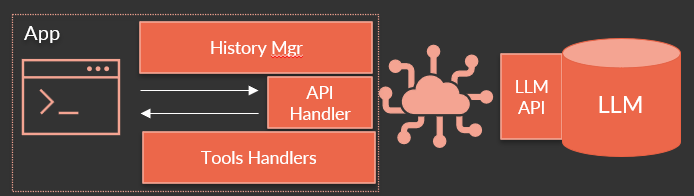

In [14]:
def add_nbrs(a,b):
    "Add a and b together"
    return a + b

def sqrt_nbr(x):
    "Take the square root of x"
    return x**0.5

def get_username(uid):
    "Get user name for a specific user id (uid)"
    return 'John Doe'

add_nbrs(2,3), sqrt_nbr(256), get_username(101)

(5, 16.0, 'John Doe')

We create a list of available tools to the LLM. Each tool includes:
- type (`function`)
- name
- text description to tell LLM what the tool does
- the list of parameters and which ones are required

In [15]:
tools = [{
    "type": "function",
    "name": "add_nbrs",
    "description": "Add two numbers together",
    "parameters": {
        "type": "object",
        "properties": {
            "a": {"type": "number", "description": "First number"},
            "b": {"type": "number", "description": "Second number"}
        },
        "required": ["a", "b"]
    }
},
   {
    "type": "function",
    "name": "sqrt_nbr",
    "description": "Take the square root of a number",
    "parameters": {
        "type": "object",
        "properties": {
            "x": {"type": "number", "description": "Number"},
        },
        "required": ["x"]
    }
},
   {
    "type": "function",
    "name": "get_username",
    "description": "Get user name for a specific user id (uid)",
    "parameters": {
        "type": "object",
        "properties": {
            "uid": {"type": "number", "description": "User ID"},
        },
        "required": ["uid"]
    }
},
   ]

### Query that will generate one tool call

In [44]:
n1, n2 = 102092, 202191
query = f"Give me the correct answer to the formula {n1} + {n2}?"
correct_answer = n1 + n2

print(f"Query: {query}")
print(f"Answer should be: {correct_answer}")

response = client.responses.create(
    model="gpt-4.1-mini",
    input=query,
    tools=tools,
    tool_choice="auto"
)
show_attr(response)

Query: Give me the correct answer to the formula 102092 + 202191?
Answer should be: 304283
id        : 	resp_038081efb00b1591006937d8492a10819db19ad8d86baecb44
error     : 	None
instructions: 	None
metadata  : 	{}
model     : 	gpt-4.1-mini-2025-04-14
object    : 	response
output    : 	[ResponseFunctionToolCall(arguments='{"a":102092,"b":202191}', call_id='call_0xoLJEtOAwHtNLPtkkMFE9fw', name='add_nbrs', type='function_call', id='fc_038081efb00b1591006937d849a7d8819d8f60ff51456e3a8c', status='completed')]
temperature: 	1.0
tools     : 	[FunctionTool(name='add_nbrs', parameters={'type': 'object', 'properties': {'a': {'type': 'number', 'description': 'First number'}, 'b': {'type': 'number', 'description': 'Second number'}}, 'required': ['a', 'b'], 'additionalProperties': False}, strict=True, type='function', description='Add two numbers together'), FunctionTool(name='sqrt_nbr', parameters={'type': 'object', 'properties': {'x': {'type': 'number', 'description': 'Number'}}, 'required': ['x'

In [45]:
show_attr(response.output[0])
fn_name = response.output[0].name
fn_args = json.loads(response.output[0].arguments)
printmd(f"Function to call: **{fn_name}** with arguments: **{fn_args}**")

arguments : 	{"a":102092,"b":202191}
name      : 	add_nbrs
type      : 	function_call
id        : 	fc_038081efb00b1591006937d849a7d8819d8f60ff51456e3a8c
status    : 	completed


Function to call: **add_nbrs** with arguments: **{'a': 102092, 'b': 202191}**

In [46]:
tool_result = globals()[fn_name](**fn_args)
tool_result

304283

In [48]:
follow_up_response = client.responses.create(
    model="gpt-4.1-mini",
    input=[
        {"role": "user", "content": query},
        {"role": "assistant", "content": f"I need to calculate. Let me use the {fn_name} function."},
        {"role": "user", "content": f"The result of {fn_name}({fn_args}) is {tool_result}. Please provide the final answer."}
    ],
    tools=tools,
    tool_choice='auto'
)
printmd(follow_up_response.output[0].content[0].text)

The correct answer to the formula 102092 + 202191 is 304,283.

### Query generating two successice tool calls

In [49]:
query = f"We need to calculate the square root of the following formula {n1} + {n2}. Give me the answer."
correct_answer = (n1+n2)**0.5
# x1 = 102934842
# query = f"What is the square root of {x1}?"
# correct_answer = x1**0.5

print(f"Query: {query}")
print(f"Answer should be: {correct_answer}")

response = client.responses.create(
    model="gpt-4.1-mini",
    input=query,
    tools=tools,
    tool_choice="required"
)
show_attr(response)

Query: We need to calculate the square root of the following formula 102092 + 202191. Give me the answer.
Answer should be: 551.6185276076212
id        : 	resp_0143fdf439104b6d006937d8b61aa481a090743117fce4fbcf
error     : 	None
instructions: 	None
metadata  : 	{}
model     : 	gpt-4.1-mini-2025-04-14
object    : 	response
output    : 	[ResponseFunctionToolCall(arguments='{"a":102092,"b":202191}', call_id='call_Sk5a2ElUnScjJPXI6URba1Vr', name='add_nbrs', type='function_call', id='fc_0143fdf439104b6d006937d8b6bdf881a0ab7fcd8ce0bba1b9', status='completed')]
temperature: 	1.0
tools     : 	[FunctionTool(name='add_nbrs', parameters={'type': 'object', 'properties': {'a': {'type': 'number', 'description': 'First number'}, 'b': {'type': 'number', 'description': 'Second number'}}, 'required': ['a', 'b'], 'additionalProperties': False}, strict=True, type='function', description='Add two numbers together'), FunctionTool(name='sqrt_nbr', parameters={'type': 'object', 'properties': {'x': {'type': 'n

In [50]:
show_attr(response.output[0])
fn_name = response.output[0].name
fn_args = json.loads(response.output[0].arguments)
printmd(f"Function to call: **{fn_name}** with arguments: **{fn_args}**")

arguments : 	{"a":102092,"b":202191}
name      : 	add_nbrs
type      : 	function_call
id        : 	fc_0143fdf439104b6d006937d8b6bdf881a0ab7fcd8ce0bba1b9
status    : 	completed


Function to call: **add_nbrs** with arguments: **{'a': 102092, 'b': 202191}**

In [51]:
tool_result = globals()[fn_name](**fn_args)
tool_result

304283

In [ ]:
follow_up_response = client.responses.create(
    model="gpt-4.1-mini",
    input=[
        {"role": "user", "content": query},
        {"role": "assistant", "content": f"I need to calculate. Let me use the {fn_name} function."},
        {"role": "user", "content": f"The result of {fn_name}({fn_args}) is {tool_result}. Please provide the final answer."}
    ],
    tools=tools,
    tool_choice="required"
)
show_attr(follow_up_response)

id        : 	resp_0865983edf329328006937d8c5c59c8197bc3e92321f23fa4e
error     : 	None
instructions: 	None
metadata  : 	{}
model     : 	gpt-4.1-mini-2025-04-14
object    : 	response
output    : 	[ResponseFunctionToolCall(arguments='{"x":304283}', call_id='call_5z41ebRRle4aFhsH6xtJ579z', name='sqrt_nbr', type='function_call', id='fc_0865983edf329328006937d8c6622081979364db0e37515c04', status='completed')]
temperature: 	1.0
tools     : 	[FunctionTool(name='add_nbrs', parameters={'type': 'object', 'properties': {'a': {'type': 'number', 'description': 'First number'}, 'b': {'type': 'number', 'description': 'Second number'}}, 'required': ['a', 'b'], 'additionalProperties': False}, strict=True, type='function', description='Add two numbers together'), FunctionTool(name='sqrt_nbr', parameters={'type': 'object', 'properties': {'x': {'type': 'number', 'description': 'Number'}}, 'required': ['x'], 'additionalProperties': False}, strict=True, type='function', description='Take the square root of 

In [53]:
show_attr(follow_up_response.output[0])
fn_name = follow_up_response.output[0].name
fn_args = json.loads(follow_up_response.output[0].arguments)
printmd(f"Function to call: **{fn_name}** with arguments: **{fn_args}**")

arguments : 	{"x":304283}
name      : 	sqrt_nbr
type      : 	function_call
id        : 	fc_0865983edf329328006937d8c6622081979364db0e37515c04
status    : 	completed


Function to call: **sqrt_nbr** with arguments: **{'x': 304283}**

In [54]:
tool_result = globals()[fn_name](**fn_args)
tool_result

551.6185276076212

In [55]:
follow_up_response = client.responses.create(
    model="gpt-4.1-mini",
    input=[
        {"role": "user", "content": query},
        {"role": "assistant", "content": f"I need to calculate. Let me use the {fn_name} function."},
        {"role": "user", "content": f"The result of {fn_name}({fn_args}) is {tool_result}. Please provide the final answer."}
    ],
    tools=tools,
    tool_choice="auto"
)
# show_attr(follow_up_response)
printmd(f"**{follow_up_response.output[0].content[0].text}**")

**The square root of the sum 102092 + 202191, which equals 304283, is approximately 551.62.**

### Query requiring database data

In [60]:
uid = 1001
query = f"""We need to send this email to the customer:
We need to send an acknowldgement email after receiving their inquiry.
The email should follow the format below:
Dear <customer name>,
One sentence confirming receipt of the email inquiry.
We are handling this and will reply within 72 hours.
Salutation
Account Representative

The customer has user id 1001.

Output only the email, no other comment or questions.
"""
correct_answer = "John Doe"

print(f"Query: {query}")
print(f"Answer should be: {correct_answer}")

response = client.responses.create(
    model="gpt-4.1-mini",
    input=query,
    tools=tools
)
show_attr(response)

Query: We need to send this email to the customer:
We need to send an acknowldgement email after receiving their inquiry.
The email should follow the format below:
Dear <customer name>,
One sentence confirming receipt of the email inquiry.
We are handling this and will reply within 72 hours.
Salutation
Account Representative

The customer has user id 1001.

Output only the email, no other comment or questions.

Answer should be: John Doe
id        : 	resp_0261718efa13008d006937da19be0c8195b2ce70c95d78a5c0
error     : 	None
instructions: 	None
metadata  : 	{}
model     : 	gpt-4.1-mini-2025-04-14
object    : 	response
output    : 	[ResponseFunctionToolCall(arguments='{"uid":1001}', call_id='call_l0Uw7gt5hpg1R15kFBfyUhGb', name='get_username', type='function_call', id='fc_0261718efa13008d006937da1a21048195a4aee31ba67f5084', status='completed')]
temperature: 	1.0
tools     : 	[FunctionTool(name='add_nbrs', parameters={'type': 'object', 'properties': {'a': {'type': 'number', 'description': 

In [61]:
show_attr(response.output[0])
fn_name = response.output[0].name
fn_args = json.loads(response.output[0].arguments)
printmd(f"Function to call: **{fn_name}** with arguments: **{fn_args}**")

arguments : 	{"uid":1001}
name      : 	get_username
type      : 	function_call
id        : 	fc_0261718efa13008d006937da1a21048195a4aee31ba67f5084
status    : 	completed


Function to call: **get_username** with arguments: **{'uid': 1001}**

In [62]:
tool_result = globals()[fn_name](**fn_args)
tool_result

'John Doe'

In [63]:
follow_up_response = client.responses.create(
    model="gpt-4.1-mini",
    input=[
        {"role": "user", "content": query},
        {"role": "assistant", "content": f"I need to calculate. Let me use the {fn_name} function."},
        {"role": "user", "content": f"The result of {fn_name}({fn_args}) is {tool_result}. Please provide the final answer."}
    ]
)
printmd(follow_up_response.output[0].content[0].text)

Dear John Doe,

We have received your email inquiry. We are handling this and will reply within 72 hours.

Best regards,  
Account Representative

## 4. Web Search

In [4]:
response_1 = client.responses.create(
    model="gpt-4.1-mini",
    input="What are the names of the ministers in the second Lecornu government in France?"
)
printmd(response_1.output_text)

The second Lecornu government in France, formed under Prime Minister Élisabeth Borne and announced in July 2022, includes Minister of the Armed Forces Sébastien Lecornu. However, if you are referring specifically to the full list of ministers in that government, I can provide the names of the main ministers from the cabinet at that time.

Could you please confirm if you want the complete list of ministers in the second Lecornu government, or just specific key ministers?

This is not updated information and wrong information.

The problem is that we used the model with the prompt as sole context. It is a **pure LLM call**, no other context performed. This is conducive to errors and hallucinations.

### 3.1 Use `web_search` tool ([doc](https://platform.openai.com/docs/guides/tools-web-search))

OpenAI offers built-in tools, including a search tool `web_search`

When `web_search` tool is made available to a gpt-4 model, it may call the tool prior to answering the question. 

The result of this search will be added to the `user` message sent to the model to generate the answer.

In [5]:
tools = [{"type": "web_search"}]

In [6]:
response = client.responses.create(
    model="gpt-4.1-mini",
    tools=tools,
    input="What are the names of the ministers in the second Lecornu government in France?"
)

printmd(response.output_text)

The second Lecornu government in France, formed on October 10, 2025, comprises the following ministers:

**Ministers:**

- **Prime Minister:** Sébastien Lecornu (RE)
- **Minister of the Interior:** Laurent Nuñez (RE)
- **Minister of the Armed Forces:** Catherine Vautrin (RE)
- **Minister of Labor and Solidarity:** Jean-Pierre Farandou (SE)
- **Minister of Ecological Transition:** Monique Barbut (SE)
- **Minister of Justice:** Gérald Darmanin (RE)
- **Minister of the Economy:** Roland Lescure (RE)
- **Minister of Small and Medium-sized Enterprises, Trade, Crafts, Tourism, and Purchasing Power:** Serge Papin (SE)
- **Minister of Agriculture:** Annie Genevard (LR)
- **Minister of Cities and Housing:** Vincent Jeanbrun (LR)

**Deputy Ministers:**

- **Minister Delegate for Relations with Parliament:** Laurent Panifous (DVG)
- **Spokesperson of the Government:** Maud Bregeon (RE)
- **Minister Delegate for Gender Equality and the Fight against Discriminations:** Aurore Bergé (RE)
- **Minister Delegate to the Minister of the Interior:** Marie-Pierre Vedrenne (MoDem)
- **Minister Delegate to the Minister of the Armed Forces:** Alice Rufo (SE)
- **Minister Delegate for the Sea and Fisheries:** Catherine Chabaud (MoDem)
- **Minister Delegate for the Ecological Transition:** Mathieu Lefèvre (RE)

This cabinet reflects a blend of continuity and new appointments, with several ministers from civil society joining the government. ([franceinenglish.com](https://franceinenglish.com/p/sebastien-lecornu-unveils-his-second-government-with-35-ministers-amid-political-challenges?utm_source=openai))

For a detailed overview of the new cabinet, you might find this video informative:

[Lecornu Government II: The new cast revealed](https://www.youtube.com/watch?v=TO58pVuGQC4&utm_source=openai)
 

In [7]:
printmd(f"The first LLM call *with no tool* returned **{len(response_1.output):,d} output**.")
printmd(f"This new LLM call *with `web_search`tool* returns **{len(response.output):,d} outputs**.")

The first LLM call *with no tool* returned **1 output**.

This new LLM call *with `web_search`tool* returns **2 outputs**.

In [8]:
for i,o in enumerate(response.output):
    print(f"Output {i}:")
    print(o, '\n')

Output 0:
ResponseFunctionWebSearch(id='ws_038a265a0cb04a24006937d55258fc819dacd28f46d0d71285', action=ActionSearch(query='names of ministers in the second Lecornu government France', type='search', sources=None), status='completed', type='web_search_call') 

Output 1:
ResponseOutputMessage(id='msg_038a265a0cb04a24006937d552fd90819db126d66673765bc5', content=[ResponseOutputText(annotations=[AnnotationURLCitation(end_index=1603, start_index=1439, title='Sébastien Lecornu Unveils His Second Government... | France in English', type='url_citation', url='https://franceinenglish.com/p/sebastien-lecornu-unveils-his-second-government-with-35-ministers-amid-political-challenges?utm_source=openai'), AnnotationURLCitation(end_index=1798, start_index=1689, title='Lecornu Government II: The new cast revealed', type='url_citation', url='https://www.youtube.com/watch?v=TO58pVuGQC4&utm_source=openai')], text='The second Lecornu government in France, formed on October 10, 2025, comprises the following 

**What is happening here:**
1. LLM gets the input message from user: *"What are the names of the ministers in the second Lecornu government in France?"*
1. Because we have informed the LLM that it may use a tool called **`web_search`**, it decides it needs to use it, and generates a **search query**
1. The `web_search` tool executes, retrieves the most relevant results from the web and **passes them back** to the LLM in its answer
1. Those search results are **added to the context** (usr message and possible system messages)
1. LLM generates the final answer using both the original question AND the search results, and produces the second output


In [9]:
show_attr(response.output[0])

id        : 	ws_038a265a0cb04a24006937d55258fc819dacd28f46d0d71285
action    : 	ActionSearch(query='names of ministers in the second Lecornu government France', type='search', sources=None)
status    : 	completed
type      : 	web_search_call


In [11]:
printmd(f'Query the LLM requests: **"{response.output[0].action.query}"**')
printmd(f'Status: **"{response.output[0].status}"**')
printmd(f'Type: **"{response.output[0].type}"**')


Query the LLM requests: **"names of ministers in the second Lecornu government France"**

Status: **"completed"**

Type: **"web_search_call"**

We can get an idea of the `web_search` results by inspecting the annotations LLM returns with its final answer.

In [12]:
annots = response.output[1].content[0].annotations
for i,a in enumerate(annots):
    printmd(f"\n**Annotation {i}**")
    show_attr(a)


**Annotation 0**

title     : 	Sébastien Lecornu Unveils His Second Government... | France in English
type      : 	url_citation
url       : 	https://franceinenglish.com/p/sebastien-lecornu-unveils-his-second-government-with-35-ministers-amid-political-challenges?utm_source=openai



**Annotation 1**

title     : 	Lecornu Government II: The new cast revealed
type      : 	url_citation
url       : 	https://www.youtube.com/watch?v=TO58pVuGQC4&utm_source=openai


In [13]:
printmd(response.output[1].content[0].text)

The second Lecornu government in France, formed on October 10, 2025, comprises the following ministers:

**Ministers:**

- **Prime Minister:** Sébastien Lecornu (RE)
- **Minister of the Interior:** Laurent Nuñez (RE)
- **Minister of the Armed Forces:** Catherine Vautrin (RE)
- **Minister of Labor and Solidarity:** Jean-Pierre Farandou (SE)
- **Minister of Ecological Transition:** Monique Barbut (SE)
- **Minister of Justice:** Gérald Darmanin (RE)
- **Minister of the Economy:** Roland Lescure (RE)
- **Minister of Small and Medium-sized Enterprises, Trade, Crafts, Tourism, and Purchasing Power:** Serge Papin (SE)
- **Minister of Agriculture:** Annie Genevard (LR)
- **Minister of Cities and Housing:** Vincent Jeanbrun (LR)

**Deputy Ministers:**

- **Minister Delegate for Relations with Parliament:** Laurent Panifous (DVG)
- **Spokesperson of the Government:** Maud Bregeon (RE)
- **Minister Delegate for Gender Equality and the Fight against Discriminations:** Aurore Bergé (RE)
- **Minister Delegate to the Minister of the Interior:** Marie-Pierre Vedrenne (MoDem)
- **Minister Delegate to the Minister of the Armed Forces:** Alice Rufo (SE)
- **Minister Delegate for the Sea and Fisheries:** Catherine Chabaud (MoDem)
- **Minister Delegate for the Ecological Transition:** Mathieu Lefèvre (RE)

This cabinet reflects a blend of continuity and new appointments, with several ministers from civil society joining the government. ([franceinenglish.com](https://franceinenglish.com/p/sebastien-lecornu-unveils-his-second-government-with-35-ministers-amid-political-challenges?utm_source=openai))

For a detailed overview of the new cabinet, you might find this video informative:

[Lecornu Government II: The new cast revealed](https://www.youtube.com/watch?v=TO58pVuGQC4&utm_source=openai)
 

### 3.2 `web_search` and domain filtering

More advanced web search to select the domain you want to explore

In [206]:
tools=[
    {
        "type": "web_search",
        "filters": {
            "allowed_domains": [
            "bencham.org",
            ]
            },
      }
  ]

query = "Give me the events organized after Nov 1, 2025 in Shanghai"


response = client.responses.create(
  model="gpt-4.1",
  tools=tools,
  tool_choice="auto",
  include=["web_search_call.action.sources"],
  input=query,
)

printmd(response.output_text)

Here are upcoming events in Shanghai organized by the Benelux Chamber of Commerce (BenCham Shanghai) scheduled **after November 1, 2025**, based solely on information available from bencham.org:

• Christkindlmarkt on the Bund — a German-style Christmas market featuring festive stalls, drinks, and international snacks, including Belgian offerings. It runs from **November 26 to December 28, 2025**, open Wednesday through Sunday. ([shanghai.bencham.org](https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks?utm_source=openai))

• BISS Christmas Fair & A‑Level Programme Launch — hosted by the British International School Shanghai (BISS Puxi), comprising a **Christmas Fair on December 6, 2025**, plus an **A‑Level Information Evening on December 8, 2025**. ([shanghai.bencham.org](https://shanghai.bencham.org/news/biss-christmas-fair-level-programme-launch?utm_source=openai))

• Aquatech China 2025 — a major water-technology exhibition at the Shanghai New International Expo Centre (SNIEC), taking place from **November 5 to 7, 2025**. ([shanghai.bencham.org](https://shanghai.bencham.org/news/aquatech-china-2025-asias-leading-water-technology-event?utm_source=openai))

• Benelux Annual Gala: "The Grand Soirée" — an elegant networking and awards evening at Paramount Shanghai scheduled for **November 29, 2025**, featuring fine dining, live music, awards presentations, entertainment, and a charity component. ([shanghai.bencham.org](https://shanghai.bencham.org/news/grand-soiree-benelux-chamber-annual-gala?utm_source=openai))

• Best of Benelux Awards — part of the gala event on **November 29, 2025**, with voting running from November 10 to November 21 (pre‑voting) and live during the gala. ([shanghai.bencham.org](https://shanghai.bencham.org/news/best-benelux-awards-voting-starts-now?utm_source=openai))

• King's Day at the Belgian Consulate — a cultural celebration held on **November 14, 2025**, featuring Belgian food stalls and a reception for Belgians and friends in Shanghai. ([shanghai.bencham.org](https://shanghai.bencham.org/news/kings-day-consulate-general-belgium-shanghai?utm_source=openai))

• Benelux Chamber–Songjiang District Business Dialogue — a meeting held on **November 10, 2025**, facilitating dialogue between Benelux companies and local government officials. ([shanghai.bencham.org](https://shanghai.bencham.org/news/benelux-chamber-deepens-ties-songjiang?utm_source=openai))

---

**Summary of Events (after November 1, 2025)**:

Date           | Event
-------------- | --------------------------------------------------------
Nov 5–7        | Aquatech China 2025 (SNIEC, water-technology expo)
Nov 10         | Benelux Chamber–Songjiang District dialogue
Nov 14         | King's Day reception at Belgian Consulate
Nov 26–Dec 28  | Christkindlmarkt on the Bund (Christmas market)
Nov 29         | Benelux Annual Gala + Best of Benelux Awards
Dec 6          | BISS Christmas Fair
Dec 8          | BISS A‑Level Information Evening

---

Let me know if you’d like more details or assistance with any of these events!

Now let's have a deeper look at the sources the model has retrieved from the search and those that were used.

In [220]:
show_attr(response.output[0])

id        : 	ws_00c79fc8f7de70020069377c871bb0819da2458d4bdd484b6e
action    : 	ActionSearch(query='events in Shanghai after November 1, 2025', type='search', sources=[ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/biss-christmas-fair-level-programme-launch'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/save-date-benelux-annual-gala-2025'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/tomorrowland-coming-shanghai'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/grand-soiree-benelux-chamber-annual-gala'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/third-sino-benelux-career-fair'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/meet-gala-charity'), ActionSearchSource(type='url', url='https://shanghai.bencham.o

The `action` object has:
- `query`: the search string
- `type`: 'search'
- `sources`: a list of `ActionSearchSource` objects

In [221]:
show_attr(response.output[0].action)

query     : 	events in Shanghai after November 1, 2025
type      : 	search
sources   : 	[ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/biss-christmas-fair-level-programme-launch'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/save-date-benelux-annual-gala-2025'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/tomorrowland-coming-shanghai'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/grand-soiree-benelux-chamber-annual-gala'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/third-sino-benelux-career-fair'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/meet-gala-charity'), ActionSearchSource(type='url', url='https://shanghai.bencham.org/news/belgian-beer-garden-park-avenue-central-pac'), ActionSearchSource(type=

Each `source` in the list has:
- `type`: 'url'
- `url`: the actual URL string

In [222]:
show_attr(response.output[0].action.sources[0])

type      : 	url
url       : 	https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks


In [223]:
response.output[0].action.query

'events in Shanghai after November 1, 2025'

In [224]:
sources = response.output[0].action.sources

printmd('**All sources from the search**')
for i,s in enumerate(sources):
    print(f"{i:02d}. {s.url}")

**All sources from the search**

00. https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks
01. https://shanghai.bencham.org/news/biss-christmas-fair-level-programme-launch
02. https://shanghai.bencham.org/news/save-date-benelux-annual-gala-2025
03. https://shanghai.bencham.org/news/tomorrowland-coming-shanghai
04. https://shanghai.bencham.org/news/grand-soiree-benelux-chamber-annual-gala
05. https://shanghai.bencham.org/news/third-sino-benelux-career-fair
06. https://shanghai.bencham.org/news/meet-gala-charity
07. https://shanghai.bencham.org/news/belgian-beer-garden-park-avenue-central-pac
08. https://shanghai.bencham.org/news/benelux-water-dragon-boat-race
09. https://shanghai.bencham.org/news/best-benelux-awards-voting-starts-now
10. https://shanghai.bencham.org/news/shanghai-french-school-talks-how-non-french-speaking-families-embrace-french-education
11. https://shanghai.bencham.org/news/showcase-your-business-international-spring-carnival-2025
12. https://shanghai.bencha

In [227]:
annots = response.output[1].content[0].annotations

printmd('**All annotations kept for the context**')
for i,a in enumerate(annots):
    printmd(f"**{i:02d}.   {a.title}** ({a.url[:50]}...)")

**All annotations kept for the context**

**00.   Christkindlmarkt on the Bund 2025 Featuring Belgian Beers and Snacks! | BenCham Shanghai** (https://shanghai.bencham.org/news/christkindlmarkt...)

**01.   BISS Christmas Fair & A-Level Programme Launch | BenCham Shanghai** (https://shanghai.bencham.org/news/biss-christmas-f...)

**02.   Aquatech China 2025 – Asia’s Leading Water Technology Event | BenCham Shanghai** (https://shanghai.bencham.org/news/aquatech-china-2...)

**03.   The Grand Soirée - Benelux Chamber Annual Gala | BenCham Shanghai** (https://shanghai.bencham.org/news/grand-soiree-ben...)

**04.   Best of Benelux Awards - Voting Starts Now! | BenCham Shanghai** (https://shanghai.bencham.org/news/best-benelux-awa...)

**05.   King's Day at the Consulate General of Belgium in Shanghai | BenCham Shanghai** (https://shanghai.bencham.org/news/kings-day-consul...)

**06.   Benelux Chamber Deepens Ties with Songjiang | BenCham Shanghai** (https://shanghai.bencham.org/news/benelux-chamber-...)

In [228]:
printmd(response.output[1].content[0].text)

Here are upcoming events in Shanghai organized by the Benelux Chamber of Commerce (BenCham Shanghai) scheduled **after November 1, 2025**, based solely on information available from bencham.org:

• Christkindlmarkt on the Bund — a German-style Christmas market featuring festive stalls, drinks, and international snacks, including Belgian offerings. It runs from **November 26 to December 28, 2025**, open Wednesday through Sunday. ([shanghai.bencham.org](https://shanghai.bencham.org/news/christkindlmarkt-bund-2025-featuring-belgian-beers-and-snacks?utm_source=openai))

• BISS Christmas Fair & A‑Level Programme Launch — hosted by the British International School Shanghai (BISS Puxi), comprising a **Christmas Fair on December 6, 2025**, plus an **A‑Level Information Evening on December 8, 2025**. ([shanghai.bencham.org](https://shanghai.bencham.org/news/biss-christmas-fair-level-programme-launch?utm_source=openai))

• Aquatech China 2025 — a major water-technology exhibition at the Shanghai New International Expo Centre (SNIEC), taking place from **November 5 to 7, 2025**. ([shanghai.bencham.org](https://shanghai.bencham.org/news/aquatech-china-2025-asias-leading-water-technology-event?utm_source=openai))

• Benelux Annual Gala: "The Grand Soirée" — an elegant networking and awards evening at Paramount Shanghai scheduled for **November 29, 2025**, featuring fine dining, live music, awards presentations, entertainment, and a charity component. ([shanghai.bencham.org](https://shanghai.bencham.org/news/grand-soiree-benelux-chamber-annual-gala?utm_source=openai))

• Best of Benelux Awards — part of the gala event on **November 29, 2025**, with voting running from November 10 to November 21 (pre‑voting) and live during the gala. ([shanghai.bencham.org](https://shanghai.bencham.org/news/best-benelux-awards-voting-starts-now?utm_source=openai))

• King's Day at the Belgian Consulate — a cultural celebration held on **November 14, 2025**, featuring Belgian food stalls and a reception for Belgians and friends in Shanghai. ([shanghai.bencham.org](https://shanghai.bencham.org/news/kings-day-consulate-general-belgium-shanghai?utm_source=openai))

• Benelux Chamber–Songjiang District Business Dialogue — a meeting held on **November 10, 2025**, facilitating dialogue between Benelux companies and local government officials. ([shanghai.bencham.org](https://shanghai.bencham.org/news/benelux-chamber-deepens-ties-songjiang?utm_source=openai))

---

**Summary of Events (after November 1, 2025)**:

Date           | Event
-------------- | --------------------------------------------------------
Nov 5–7        | Aquatech China 2025 (SNIEC, water-technology expo)
Nov 10         | Benelux Chamber–Songjiang District dialogue
Nov 14         | King's Day reception at Belgian Consulate
Nov 26–Dec 28  | Christkindlmarkt on the Bund (Christmas market)
Nov 29         | Benelux Annual Gala + Best of Benelux Awards
Dec 6          | BISS Christmas Fair
Dec 8          | BISS A‑Level Information Evening

---

Let me know if you’d like more details or assistance with any of these events!

## 5. Low Code Platforms

There are a range of low code platform allowing to do the same easily:
- N8N: https://n8n.io
- DIFY: https://dify.ai/

Let's use N8N because it also allows to use built-in tools:
- https://docs.n8n.io/advanced-ai/intro-tutorial/